In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('avocado.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [166]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [167]:
# Check if there are any missing values
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [168]:
# Check the data types of the columns
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [169]:
# Print the unique values in type, year and region columns
print(df['type'].unique())
print(df['year'].unique())
print(df['region'].unique())

['conventional' 'organic']
[2015 2016 2017 2018]
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [170]:
# Seperate the TotalUS data from the dataset and store it in a new dataframe
df_totalUS = df[df['region'] == 'TotalUS']

df_totalUS.head()

# Check the shape of the new dataframe
df_totalUS.shape

(338, 13)

In [171]:
df_totalUS.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS


In [172]:
# Get rid of the TotalUS data from the original dataframe
df = df[df['region'] != 'TotalUS']

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [173]:
# Mean, Median, Mode, Standard Deviation, Variance, Range, Interquartile Range of AveragePrice, Total Volume. 
# Also, find the 25th, 50th and 75th percentile of AveragePrice, Total Volume.

#Create a Table to display the above values
df_table = pd.DataFrame(columns=['Mean', 'Median','Standard Deviation', 'Variance', 'Range', 'Interquartile Range'], index=['AveragePrice', 'Total Volume'])

# Calculate the mean, median, standard deviation, variance, range and interquartile range of AveragePrice and Total Volume and round the values to 2 decimal places
df_table.loc['AveragePrice'] = [round(df['AveragePrice'].mean(), 2), round(df['AveragePrice'].median(), 2), round(df['AveragePrice'].std(), 2), round(df['AveragePrice'].var(), 2), round(df['AveragePrice'].max() - df['AveragePrice'].min(), 2), round(df['AveragePrice'].quantile(0.75) - df['AveragePrice'].quantile(0.25), 2)]
df_table.loc['Total Volume'] = [round(df['Total Volume'].mean(), 2), round(df['Total Volume'].median(), 2), round(df['Total Volume'].std(), 2), round(df['Total Volume'].var(), 2), round(df['Total Volume'].max() - df['Total Volume'].min(), 2), round(df['Total Volume'].quantile(0.75) - df['Total Volume'].quantile(0.25), 2)]

df_table

,Mean,Median,Standard Deviation,Variance,Range,Interquartile Range
AveragePrice,1.41,1.37,0.4,0.16,2.81,0.57
Total Volume,539258.69,100154.13,1224331.91,1498988635474.340088,11274664.55,389605.66


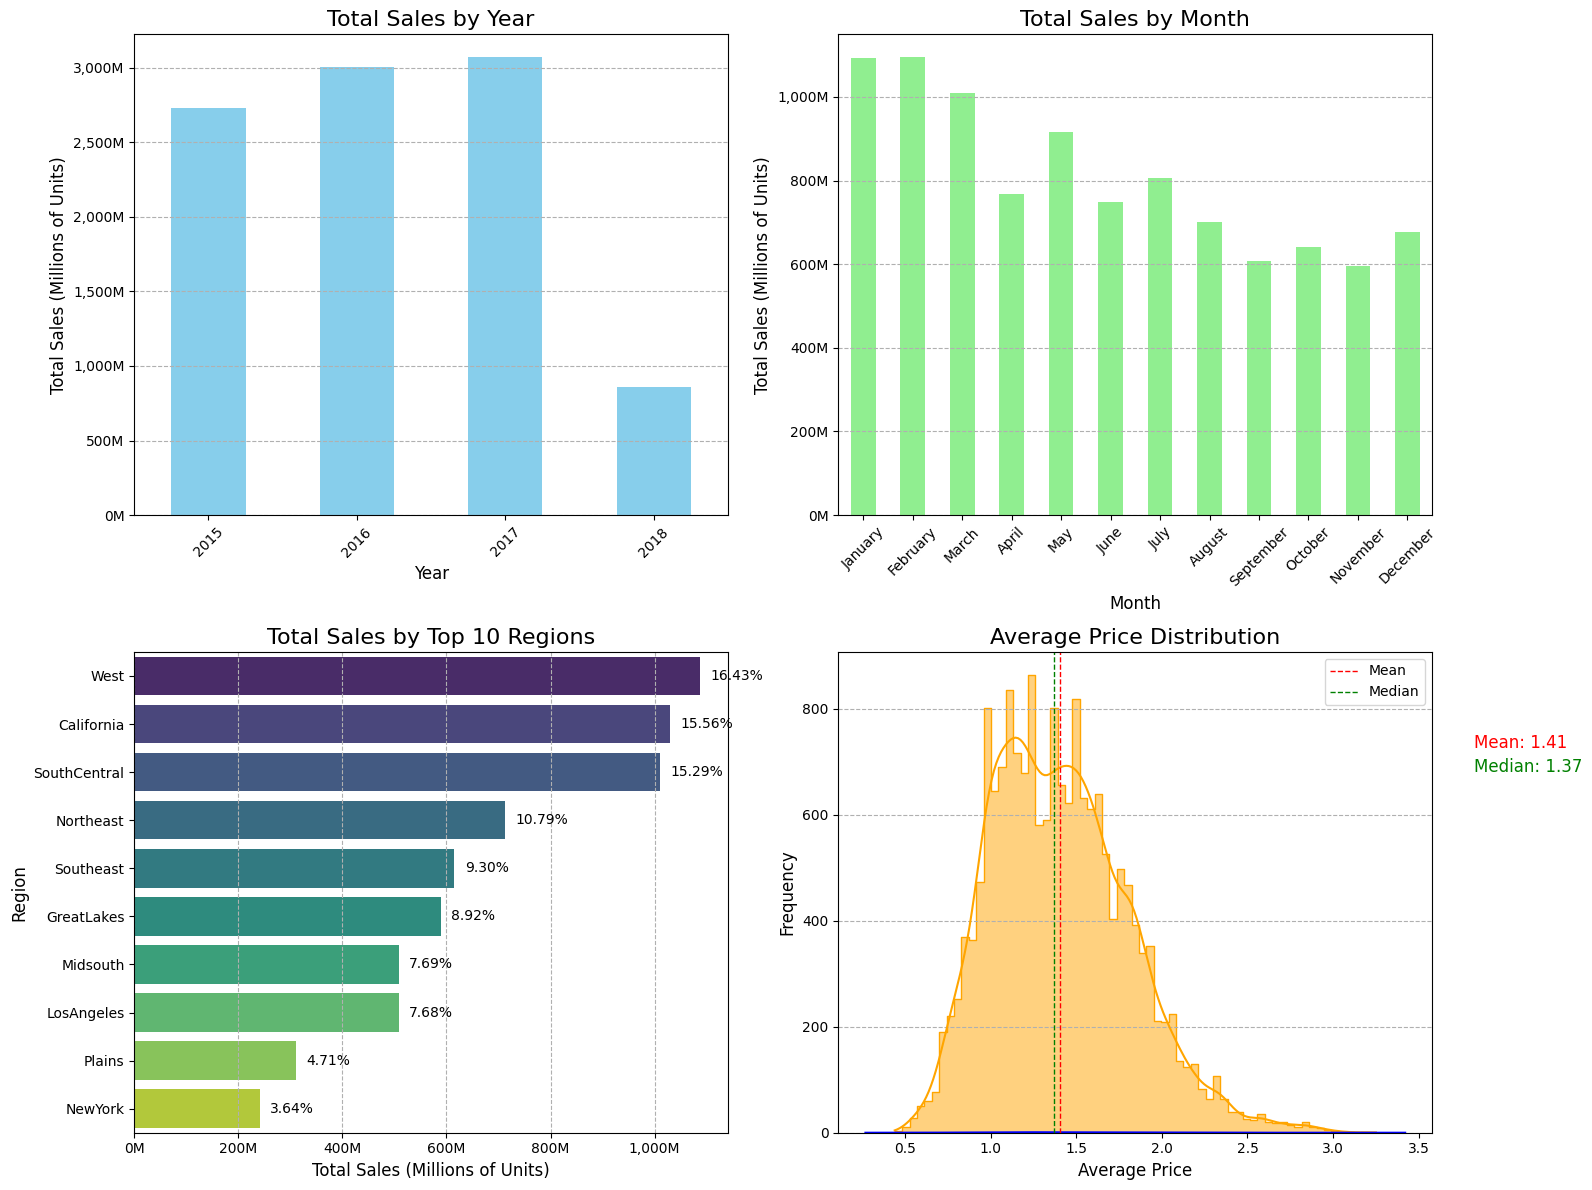

In [189]:
import seaborn as sns
import matplotlib.ticker as ticker
import calendar

# Set the figure size for the dashboard
plt.figure(figsize=(16, 12))

# Sales by Year
plt.subplot(2, 2, 1)
sales_by_year = df.groupby(df['Date'].dt.year)['Total Volume'].sum() / 1000000
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (Millions of Units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}M'))

# Sales by Month
plt.subplot(2, 2, 2)
sales_by_month = df.groupby(df['Date'].dt.month)['Total Volume'].sum() / 1000000
sales_by_month.index = sales_by_month.index.map(lambda x: calendar.month_name[x])
sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (Millions of Units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}M'))

# Sales by Region
plt.subplot(2, 2, 3)
top_regions = df.groupby('region')['Total Volume'].sum().nlargest(10) / 1000000
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Total Sales by Top 10 Regions', fontsize=16)
plt.xlabel('Total Sales (Millions of Units)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}M'))

# Add percentage labels
total_volume = top_regions.sum()
for i, region in enumerate(top_regions.index):
    volume = top_regions[i]
    percentage = (volume / total_volume) * 100
    plt.text(volume + 20, i, f'{percentage:.2f}%', ha='left', va='center')

# Average Price Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='AveragePrice', kde=True, color='orange', element='step')
sns.kdeplot(data=df, x='AveragePrice', color='blue')
# Add a vertical line at the mean
mean_price = df['AveragePrice'].mean()
median_price = df['AveragePrice'].median()
# Label the mean and median
plt.text(1.07, 0.8, 'Mean: 1.41', fontsize=12, color='red', transform=plt.gca().transAxes)
plt.text(1.07, 0.75, 'Median: 1.37', fontsize=12, color='green', transform=plt.gca().transAxes)


plt.axvline(mean_price, color='red', linestyle='--', linewidth=1, label='Mean')
# Add a vertical line at the median
plt.axvline(median_price, color='green', linestyle='--', linewidth=1, label='Median')


plt.title('Average Price Distribution', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--')

# Add legend for mean and median
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the dashboard
plt.show()


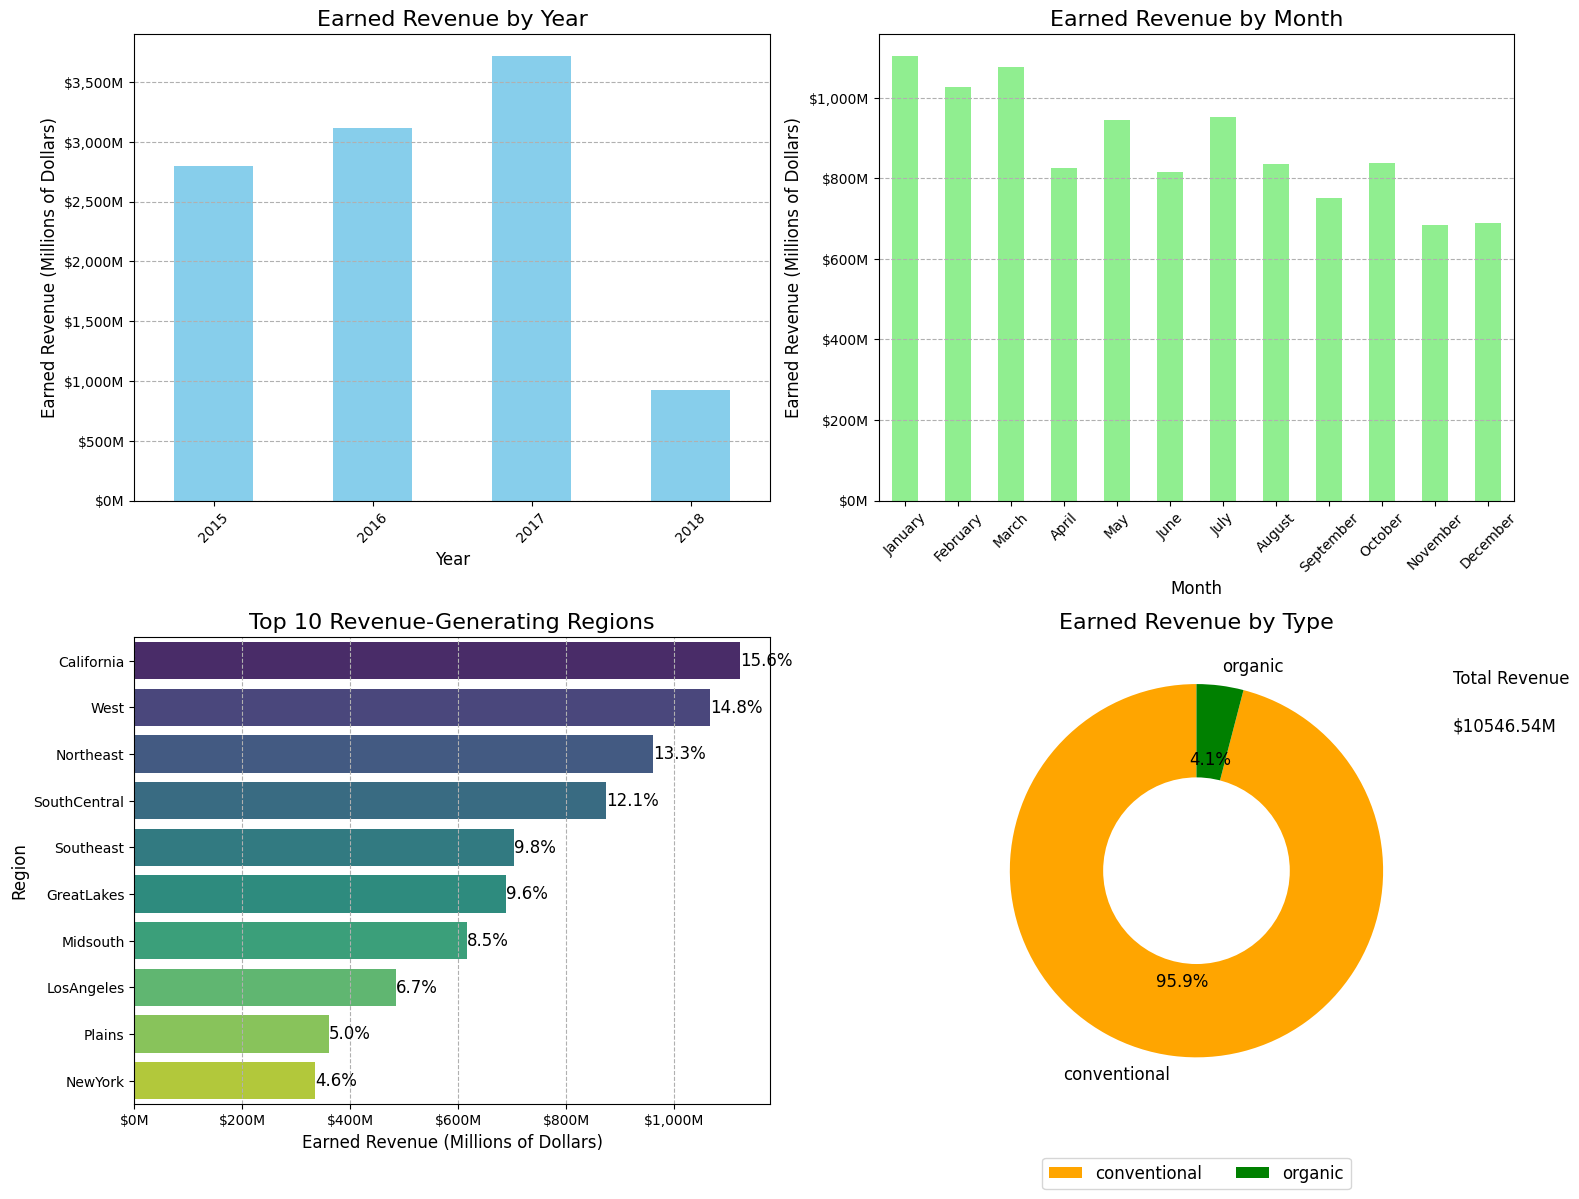

In [151]:
# Calculate the earned revenue by multiplying the average price with total volume
df['EarnedRevenue'] = df['AveragePrice'] * df['Total Volume']

# Earned Revenue by Year
earned_revenue_by_year = df.groupby(df['Date'].dt.year)['EarnedRevenue'].sum() / 1000000

# Earned Revenue by Month
earned_revenue_by_month = df.groupby(df['Date'].dt.month)['EarnedRevenue'].sum() / 1000000
earned_revenue_by_month.index = earned_revenue_by_month.index.map(lambda x: calendar.month_name[x])

# Earned Revenue by Region
earned_revenue_by_region = df.groupby('region')['EarnedRevenue'].sum() / 1000000

# Earned Revenue by Type
earned_revenue_by_type = df.groupby('type')['EarnedRevenue'].sum() / 1000000

# Top 10 revenue-generating regions
top_10_regions = earned_revenue_by_region.nlargest(10)

# Calculate the percentage of total revenue for each region
region_revenue_percentage = (top_10_regions / top_10_regions.sum()) * 100

# Set the figure size for the visualizations
plt.figure(figsize=(16, 12))

# Earned Revenue by Year
plt.subplot(2, 2, 1)
earned_revenue_by_year.plot(kind='bar', color='skyblue')
plt.title('Earned Revenue by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Earned Revenue (Millions of Dollars)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

# Earned Revenue by Month
plt.subplot(2, 2, 2)
earned_revenue_by_month.plot(kind='bar', color='lightgreen')
plt.title('Earned Revenue by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Earned Revenue (Millions of Dollars)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

# Earned Revenue by Type
plt.subplot(2, 2, 3)

sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette='viridis')
plt.title('Top 10 Revenue-Generating Regions', fontsize=16)
plt.xlabel('Earned Revenue (Millions of Dollars)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

# Display percentage of total revenue for each region
for i, region in enumerate(top_10_regions.index):
    plt.text(top_10_regions.values[i] + 0.5, i, f'{region_revenue_percentage[i]:.1f}%', fontsize=12, va='center')


# Top 10 revenue-generating regions
plt.subplot(2, 2, 4)


colors = ['orange', 'green']
plt.pie(earned_revenue_by_type, labels=earned_revenue_by_type.index, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12})
plt.title('Earned Revenue by Type', fontsize=16)
circle = plt.Circle(xy=(0, 0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)
plt.grid(axis='x', linestyle='--')
plt.text(1.05, 0.9, 'Total Revenue', fontsize=12, transform=plt.gca().transAxes)
plt.text(1.05, 0.8, f'${round(earned_revenue_by_type.sum(), 2)}M', fontsize=12, transform=plt.gca().transAxes)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the visualizations
plt.show()


/var/folders/yd/h0ymdqrj7cx_l338617ljgpm0000gn/T/ipykernel_5130/4151013936.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.resample('W').mean()


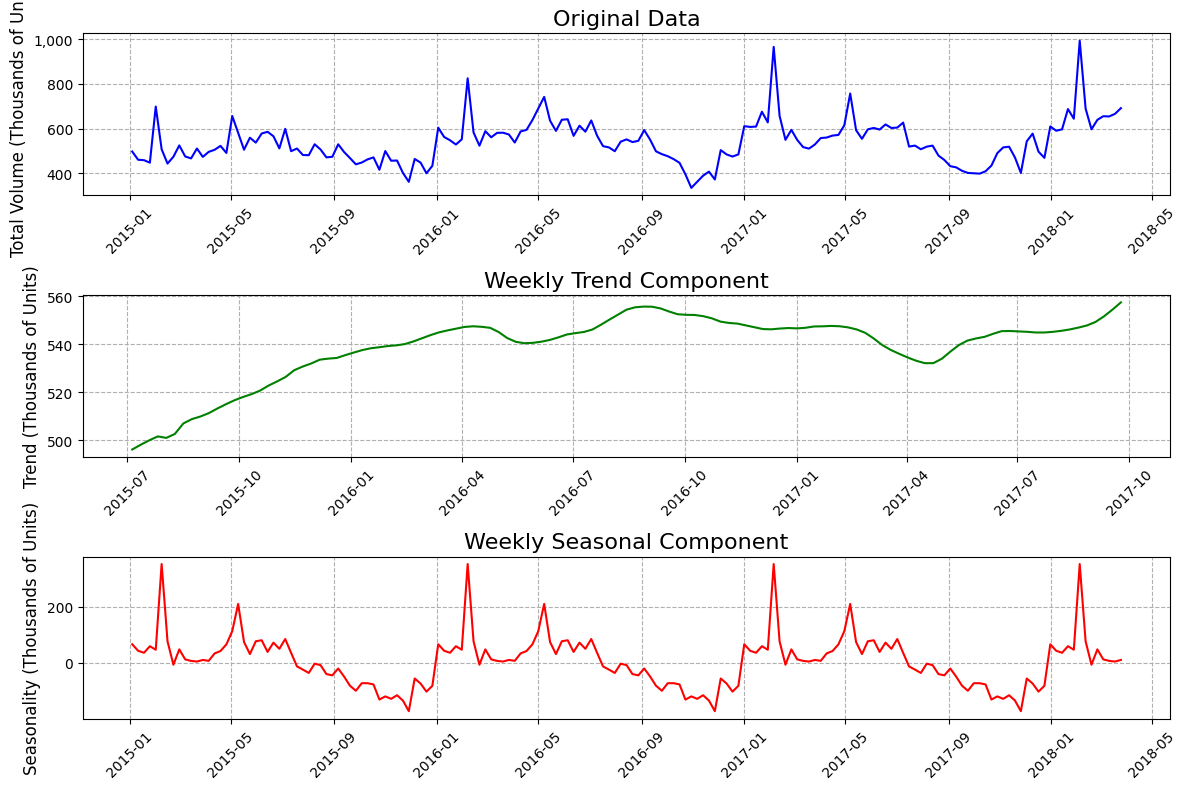

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.ticker as ticker

# Load the dataset
df = pd.read_csv('avocado.csv')

# Remove the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Remove the 'TotalUS' region
df = df[df['region'] != 'TotalUS']

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to weekly frequency
df_weekly = df.resample('W').mean()

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df_weekly['Total Volume'], model='additive')

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the original data
plt.subplot(3, 1, 1)
plt.plot(df_weekly.index, df_weekly['Total Volume'] / 1000, color='blue')
plt.title('Original Data', fontsize=16)
plt.ylabel('Total Volume (Thousands of Units)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot the trend component
plt.subplot(3, 1, 2)
plt.plot(df_weekly.index, decomposition.trend / 1000, color='green')
plt.title('Weekly Trend Component', fontsize=16)
plt.ylabel('Trend (Thousands of Units)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot the seasonal component
plt.subplot(3, 1, 3)
plt.plot(df_weekly.index, decomposition.seasonal / 1000, color='red')
plt.title('Weekly Seasonal Component', fontsize=16)
plt.ylabel('Seasonality (Thousands of Units)', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


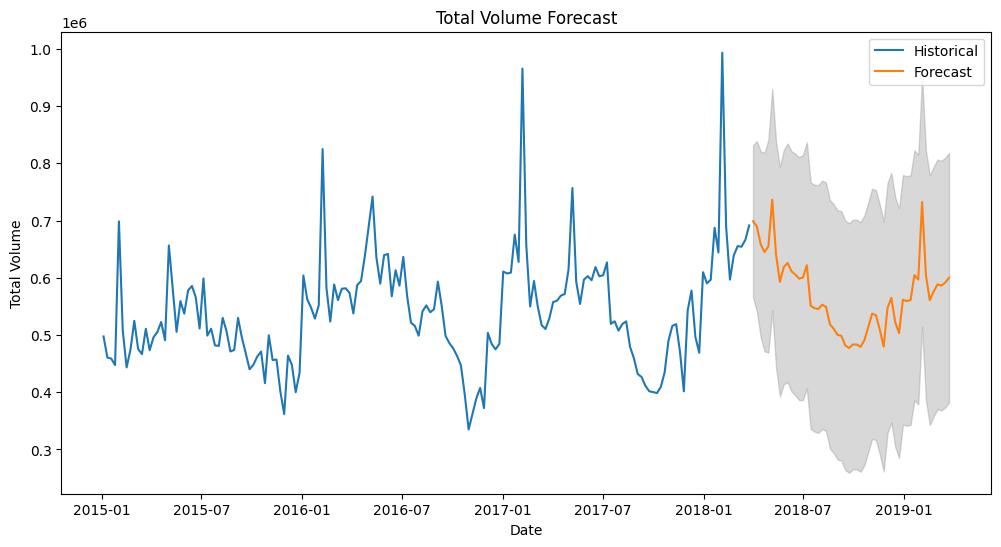

In [117]:
from pmdarima import auto_arima

# Select the 'Total Volume' column
total_volume = df_weekly['Total Volume']

# Select other features as exogenous variables except 'Total Volume' and 'Year'
exogenous_variables = df_weekly.drop(['Total Volume','year'], axis=1)  

# Perform automated ARIMA model selection with exogenous variables and seasonal modeling
model = auto_arima(total_volume, exogenous=exogenous_variables, seasonal=True, m=52, suppress_warnings=True)

# Forecast future Total Volume
future_steps = 52  # Number of future steps to forecast
forecast, conf_int = model.predict(n_periods=future_steps, exogenous=exogenous_variables[-future_steps:], return_conf_int=True)

# Create a range of future dates for plotting
future_dates = pd.date_range(start=total_volume.index[-1], periods=future_steps + 1, freq='W')[1:]

# Plot the historical and forecasted Total Volume
plt.figure(figsize=(12, 6))
plt.plot(total_volume.index, total_volume, label='Historical')
plt.plot(future_dates, forecast, label='Forecast')
plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3)
plt.title('Total Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.legend()
plt.show()
